In [0]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
%matplotlib inline

In [0]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


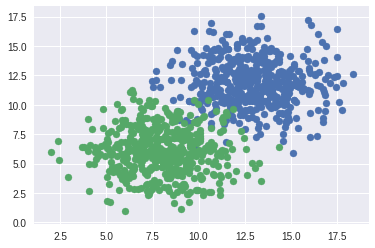

In [17]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [18]:
model = Sequential()
model.add(Dense(units= 1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')

Epoch 1/500
1000/1000 [==============================] - 0s 334us/step - loss: 1.0719 - acc: 0.5890
Epoch 2/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.5580 - acc: 0.7100
Epoch 3/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.4469 - acc: 0.8040
Epoch 4/500
1000/1000 [==============================] - 0s 24us/step - loss: 0.3730 - acc: 0.8750
Epoch 5/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.3279 - acc: 0.9190
Epoch 6/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.2951 - acc: 0.9250
Epoch 7/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.2653 - acc: 0.9400
Epoch 8/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.2380 - acc: 0.9510
Epoch 9/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.2174 - acc: 0.9590
Epoch 10/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.2015 - acc: 0.9630
Epoch 11

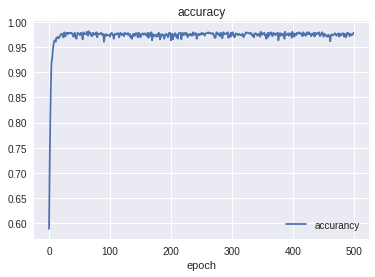

In [24]:
plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accurancy'])

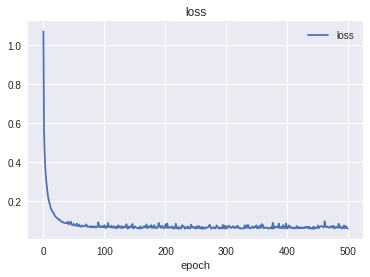

In [25]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

Prediction is:  [[0.99998176]]


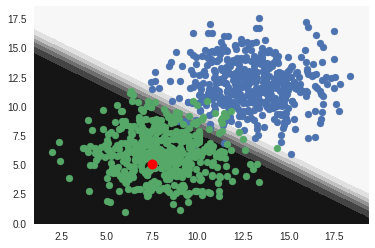

In [26]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("Prediction is: ", prediction)